In [1]:
import tensorflow as tf
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, Adagrad, Adadelta, SGD
import matplotlib.pyplot as plt 

# Check if using GPU
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
y_train.shape

(50000, 1)

In [5]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [6]:
num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Initial Run

In [8]:
batch_size = 128
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 77us/step - loss: 2.2

Text(0.5, 1.0, 'Accuracy Curves')

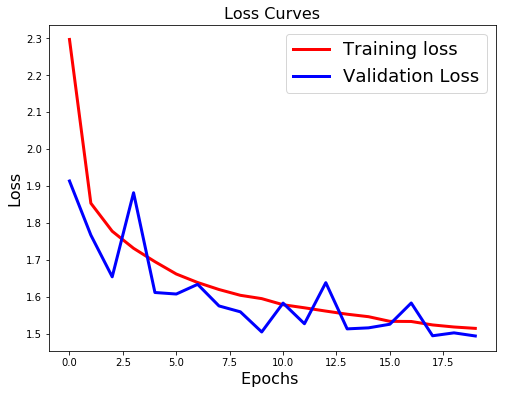

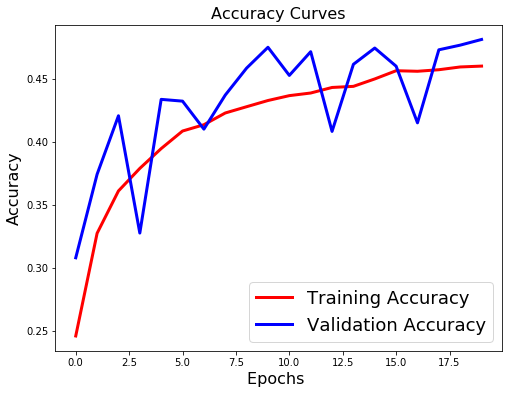

In [13]:
# https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## 1. Number of Epochs

In [14]:
batch_size = 128
epochs = 50

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history1 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2

Text(0.5, 1.0, 'Accuracy Curves')

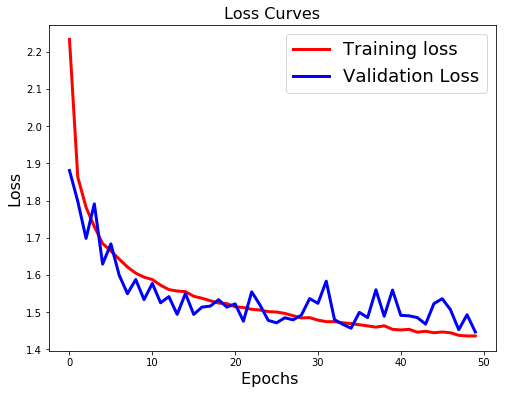

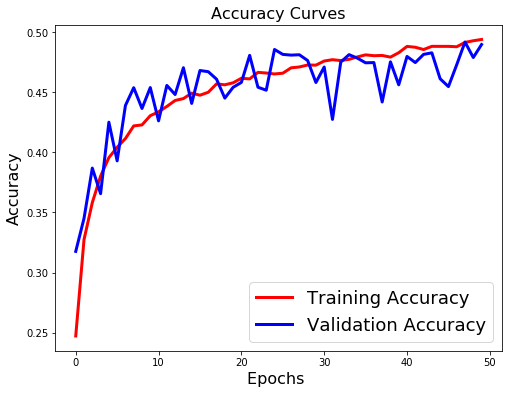

In [15]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['acc'],'r',linewidth=3.0)
plt.plot(history1.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [17]:
batch_size = 128
epochs = 100

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 73us/step - loss: 2.

Text(0.5, 1.0, 'Accuracy Curves')

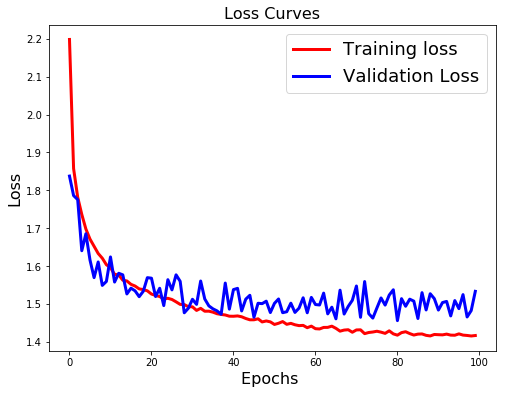

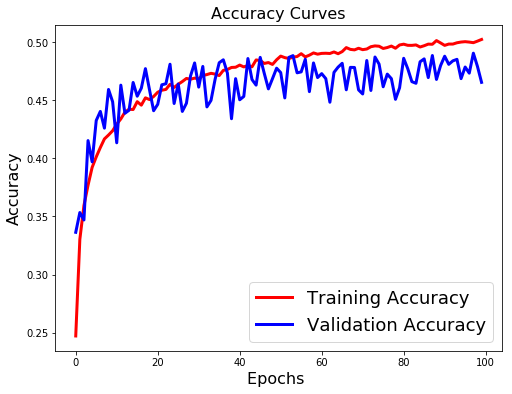

In [18]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Increasing the number of epochs from 20 to 50 brought a marginal improvement. With 100 epochs, after the first 50 the evaluation metrics fluctuate within a narrow range and eventually the test results separate from the training results indicating overfitting. In looking at the 50 and 100 epoch plots, the validation scores stop improving around 40, so I will use that value going forward.



## 2. Batch Size

In [7]:
batch_size = 128
epochs = 40

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history1a = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 3s 70us/step - loss: 2.1

In [8]:
batch_size = 256
epochs = 40

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history3 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 2s 39us/step - loss: 2.3

In [18]:
batch_size = 512
epochs = 40

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history4 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 1s 29us/step - loss: 3.0

In [10]:
batch_size = 1024
epochs = 40

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history5 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 1s 16us/step - loss: 3.5

Text(0.5, 1.0, 'Accuracy Curves')

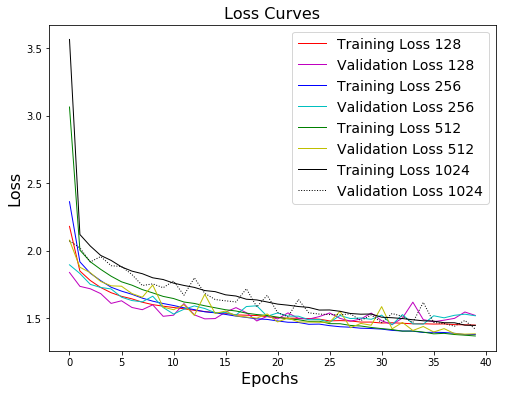

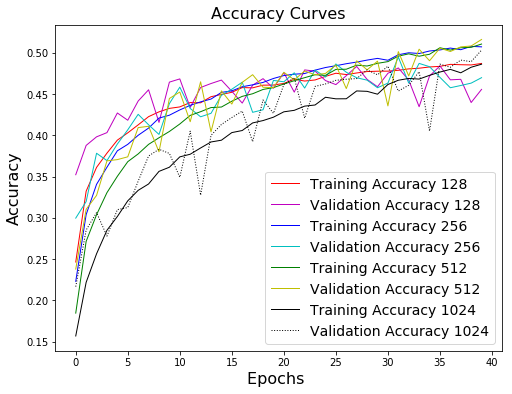

In [19]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history1a.history['loss'],'r', linewidth=1.0)
plt.plot(history1a.history['val_loss'],'m',linewidth=1.0)
plt.plot(history3.history['loss'],'b',linewidth=1.0)
plt.plot(history3.history['val_loss'],'c',linewidth=1.0)
plt.plot(history4.history['loss'],'g',linewidth=1.0)
plt.plot(history4.history['val_loss'],'y',linewidth=1.0)
plt.plot(history5.history['loss'],'k',linewidth=1.0)
plt.plot(history5.history['val_loss'],'k',linewidth=1.0, linestyle='dotted')
plt.legend(['Training Loss 128', 'Validation Loss 128',
           'Training Loss 256', 'Validation Loss 256',
           'Training Loss 512', 'Validation Loss 512',
           'Training Loss 1024', 'Validation Loss 1024'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history1a.history['acc'],'r',linewidth=1.0)
plt.plot(history1a.history['val_acc'],'m',linewidth=1.0)
plt.plot(history3.history['acc'],'b',linewidth=1.0)
plt.plot(history3.history['val_acc'],'c',linewidth=1.0)
plt.plot(history4.history['acc'],'g',linewidth=1.0)
plt.plot(history4.history['val_acc'],'y',linewidth=1.0) 
plt.plot(history5.history['acc'],'k',linewidth=1.0)
plt.plot(history5.history['val_acc'],'k',linewidth=1.0, linestyle='dotted')
plt.legend(['Training Accuracy 128', 'Validation Accuracy 128',
           'Training Accuracy 256', 'Validation Accuracy 256',
           'Training Accuracy 512', 'Validation Accuracy 512',
           'Training Accuracy 1024', 'Validation Accuracy 1024'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Based on the plots, either 512 or 1024 may be optimal. It also appears as though while 40 epochs was optimal for a batch size of 128, with the larger batches more epochs will be useful. Thus I re-run 512 and 1024 at 50 epochs.

In [15]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history4a = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 26us/step - loss: 2.7

In [16]:
batch_size = 1024
epochs = 50

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history5a = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 18us/step - loss: 3.7

Text(0.5, 1.0, 'Accuracy Curves')

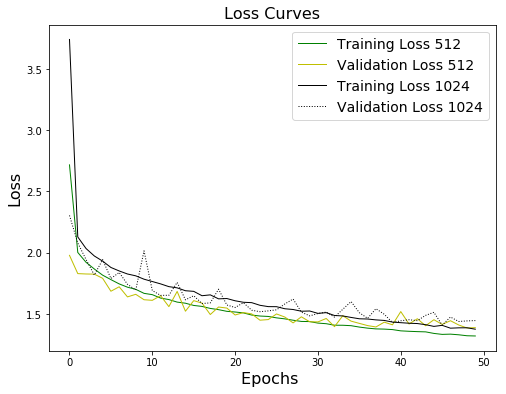

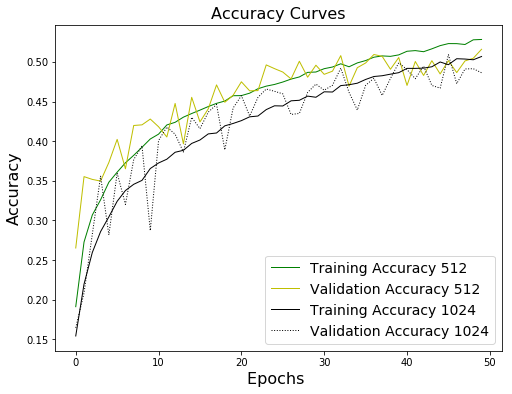

In [17]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history4a.history['loss'],'g',linewidth=1.0)
plt.plot(history4a.history['val_loss'],'y',linewidth=1.0)
plt.plot(history5a.history['loss'],'k',linewidth=1.0)
plt.plot(history5a.history['val_loss'],'k',linewidth=1.0, linestyle='dotted')
plt.legend(['Training Loss 512', 'Validation Loss 512',
           'Training Loss 1024', 'Validation Loss 1024'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history4a.history['acc'],'g',linewidth=1.0)
plt.plot(history4a.history['val_acc'],'y',linewidth=1.0) 
plt.plot(history5a.history['acc'],'k',linewidth=1.0)
plt.plot(history5a.history['val_acc'],'k',linewidth=1.0, linestyle='dotted')
plt.legend(['Training Accuracy 512', 'Validation Accuracy 512',
           'Training Accuracy 1024', 'Validation Accuracy 1024'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

From this second run, it is clear that 40 is the correct number of epochs for these batch sizes to avoid overfitting, and 512 has on average better accuracy and loss.

## 3. Network Configuration
### A. Number of neurons in each layer

In [37]:
batch_size = 512
epochs = 40

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history6 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_33 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_34 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                10250     
Total params: 4,206,602
Trainable params: 4,206,602
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 2s 37us/step - loss: 8.4

In [26]:
batch_size = 512
epochs = 40

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history7 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_27 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 2s 36us/step - loss: 9.1

In [27]:
batch_size = 512
epochs = 40

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history8 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 2s 32us/step - loss: 2.7

In [28]:
batch_size = 512
epochs = 40

model = Sequential()
model.add(Dense(768, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(768, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history9 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 768)               2360064   
_________________________________________________________________
dropout_31 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 768)               590592    
_________________________________________________________________
dropout_32 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                7690      
Total params: 2,958,346
Trainable params: 2,958,346
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 2s 31us/step - loss: 4.8

In [53]:
batch_size = 512
epochs = 40

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history10 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_40 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_41 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 2s 30us/step - loss: 2.3211 

Text(0.5, 1.0, 'Accuracy Curves')

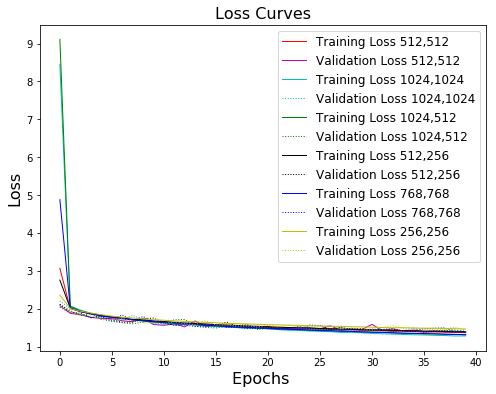

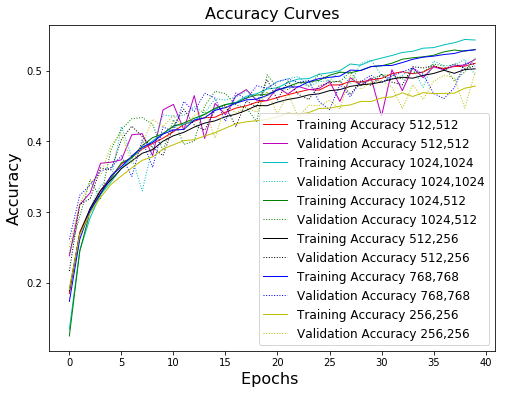

In [50]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history4.history['loss'],'r', linewidth=1.0)
plt.plot(history4.history['val_loss'],'m',linewidth=1.0)
plt.plot(history6.history['loss'],'c',linewidth=1.0)
plt.plot(history6.history['val_loss'],'c',linewidth=1.0, linestyle='dotted')
plt.plot(history7.history['loss'],'g',linewidth=1.0)
plt.plot(history7.history['val_loss'],'g',linewidth=1.0, linestyle='dotted')
plt.plot(history8.history['loss'],'k',linewidth=1.0)
plt.plot(history8.history['val_loss'],'k',linewidth=1.0, linestyle='dotted')
plt.plot(history9.history['loss'],'b',linewidth=1.0)
plt.plot(history9.history['val_loss'],'b',linewidth=1.0, linestyle='dotted')
plt.plot(history10.history['loss'],'y',linewidth=1.0)
plt.plot(history10.history['val_loss'],'y',linewidth=1.0, linestyle='dotted')

plt.legend(['Training Loss 512,512', 'Validation Loss 512,512',
           'Training Loss 1024,1024', 'Validation Loss 1024,1024',
           'Training Loss 1024,512', 'Validation Loss 1024,512',
           'Training Loss 512,256', 'Validation Loss 512,256',
           'Training Loss 768,768', 'Validation Loss 768,768',
           'Training Loss 256,256', 'Validation Loss 256,256'],fontsize=12)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history4.history['acc'],'r',linewidth=1.0)
plt.plot(history4.history['val_acc'],'m',linewidth=1.0)
plt.plot(history6.history['acc'],'c',linewidth=1.0)
plt.plot(history6.history['val_acc'],'c',linewidth=1.0, linestyle='dotted')
plt.plot(history7.history['acc'],'g',linewidth=1.0)
plt.plot(history7.history['val_acc'],'g',linewidth=1.0, linestyle='dotted') 
plt.plot(history8.history['acc'],'k',linewidth=1.0)
plt.plot(history8.history['val_acc'],'k',linewidth=1.0, linestyle='dotted')
plt.plot(history9.history['acc'],'b',linewidth=1.0)
plt.plot(history9.history['val_acc'],'b',linewidth=1.0, linestyle='dotted')
plt.plot(history10.history['acc'],'y',linewidth=1.0)
plt.plot(history10.history['val_acc'],'y',linewidth=1.0, linestyle='dotted')
plt.legend(['Training Accuracy 512,512', 'Validation Accuracy 512,512',
           'Training Accuracy 1024,1024', 'Validation Accuracy 1024,1024',
           'Training Accuracy 1024,512', 'Validation Accuracy 1024,512',
           'Training Accuracy 512,256', 'Validation Accuracy 512,256',
           'Training Accuracy 768,768', 'Validation Accuracy 768,768',
           'Training Accuracy 256,256', 'Validation Accuracy 256,256'],fontsize=12)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Larger numbers of neurons seem to correspond to overfitting. For now I will continue to use 512 neurons for the hidden layers.

### B. Number of Layers

In [52]:
batch_size = 512
epochs = 40

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history11 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                5130      
Total para

KeyboardInterrupt: 

In [29]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history12 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_26 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_27 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                5130      
Total para

Test loss: 1.3917429903030396
Test accuracy: 0.5175


In [30]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history13 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_29 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_30 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               262656    
__________

Epoch 49/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.3168 - acc: 0.5294 - val_loss: 1.4581 - val_acc: 0.4812
Epoch 50/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.3163 - acc: 0.5336 - val_loss: 1.4134 - val_acc: 0.5021
Test loss: 1.4134457174301147
Test accuracy: 0.5021


In [31]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history14 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_33 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                5130      
Total para

Test loss: 1.4360196613311769
Test accuracy: 0.4842


The optimal architecture seems to be 2 dense layers with 1024 neurons and one dense layer with 512 neurons, however the loss and accuracy are still within a narrow range, with the accuracy hovering around 50%.

## 4. Learning Rate

In [32]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=.01),
              metrics=['accuracy'])

history15 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_36 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_37 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 10)                5130      
Total para

In [35]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history16 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_42 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_43 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 10)                5130      
Total para

Test loss: 1.3356160455703736
Test accuracy: 0.5263


In [37]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adagrad(),
              metrics=['accuracy'])

history17 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_45 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_46 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_47 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 10)                5130      
Total para

In [38]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])

history18 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_48 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_49 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_50 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 10)                5130      
Total para

Test loss: 1.3546060432434082
Test accuracy: 0.5232


In [39]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history19 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_51 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_52 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_53 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 10)                5130      
Total para

Test loss: 1.437568800354004
Test accuracy: 0.4885


As confirmed with RMSprop, the optimizers perform best with their default values. Based on the default values, the Adam optimizer gives the best performance. It has a learning rate of 0.001.

## 5. Activation Function

In [40]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='relu'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history20 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_54 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_55 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_77 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_56 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 10)                5130      
Total para

Test loss: 1.6289936504364013
Test accuracy: 0.4232


In [41]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history21 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_57 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_80 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_58 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_81 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_59 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 10)                5130      
Total para

Test loss: 2.3025851249694824
Test accuracy: 0.1


In [42]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softplus'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history22 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_60 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_84 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_61 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_85 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 10)                5130      
Total para

Test loss: 1.310012682723999
Test accuracy: 0.5456


In [43]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softsign'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history23 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_63 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_88 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_64 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_89 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_65 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 10)                5130      
Total para

Epoch 49/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Test loss: 1.1920930376163597e-07
Test accuracy: 0.1


In [44]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='tanh'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history24 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_66 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_67 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_93 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_68 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 10)                5130      
Total para

In [45]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='softplus'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softplus'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history25 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_69 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_70 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_97 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_71 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 10)                5130      
Total para

Test loss: 1.3198009716033936
Test accuracy: 0.558


In [46]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='softplus'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='softplus'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softplus'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history26 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_72 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_100 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_73 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_101 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_74 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 10)                5130      
Total para

Test loss: 1.3135680456161498
Test accuracy: 0.5634


In [47]:
batch_size = 512
epochs = 50

model = Sequential()
model.add(Dense(1024, activation='softplus', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='softplus'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='softplus'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softplus'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history27 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_75 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_76 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_105 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_77 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 10)                5130      
Total para

Test loss: 1.3692785682678223
Test accuracy: 0.5658
